# Data exploration

We start by reading in all datasets and joining them in a single dataset.

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
#from matplotlib import style
#style.use('dark_background')
plt.style.use('seaborn-dark')
plt.style.use('dark_background')

In [2]:
list_files = ['mov_unif_variado.csv','lancamento_vertical.csv',
             'queda_livre.csv','lancamento_obliquo.csv',
             'lancamento_horizontal.csv','movimento_circular.csv',
             'estatica_ponto_material.csv','centro_massa.csv',
             'estatica_corpo_extenso.csv','leis_Newton.csv',
             'forcas_tracao_normal_peso.csv','forca_elastica.csv',
             'trabalho_energia.csv','forca_atrito.csv',
             'lei_Kepler.csv', 'cinematica_vetorial.csv',
              'velocidade_escape.csv','aceleracao_gravidade.csv',
              'quantidade_movimento.csv','gravitacao.csv'
             ]

df1 = pd.read_csv('movimento_e_repouso.csv')
df2 = pd.read_csv('movimento_uniforme.csv')
df = pd.concat([df1,df2], axis=0)

for i in list_files:
    dfi = pd.read_csv(i)
    df = pd.concat([df,dfi],axis = 0, ignore_index = True)

## Our goals

It is useful to define our goals beforehand in order to guide us in our exploration, cleaning and analysis later on.

We want to answer the following questions:
<br/><br/>
1. Is there a correlation between time duration of the videos and the number of views and/or likes?
<br/><br/>
2. Which class of topics would be more rewarding to invest our attention on? Hard topics, easy or moderate ones?
<br/><br/>
3. Once we have the answer for question 2, what specific topics are worth investing on video production for my youtube channel?

## A guessing game

Before doing any exploration, it is fun and very useful to try to guess the outcome of the questions we posed. I guess the following answer for the first two questions:
<br/><br/>
**Answer 1:** There is a negative correlation between the time duration and the number of likes/views (score - this will be defined later on) of the videos analysed. 

That means that longer videos would catch less atention from the students than shorter ones.

While making videos for youtube I remember always becoming a bit anxious to force the video duration to be under 8 minutes precisely because of this guess. My intuition is that students have a lack of attention in general and want to learn things fast.
<br/><br/>
**Answer 2:**  **Easy** topics have more views than **hard** topics.

That would happen because of the struggles students face when start learning physics. They seem to get stuck right in the beginning.
<br/><br/>
**Answer 3:** Even though easy topics would have more views I expect to find a reasonable amount of easy topics that are not well covered.

I believe people that make videos for youtube intuitively think that hard topics should get more attention, so I believe the easy topics will be a better target.


## General overview of the dataframe

In [3]:
df

,Unnamed: 0,video_id,title,description,tags,channel_id,duration,view_count,like_count,topic,subtopic,dificulty
0,0,YBt1-ry_cbw,Stoodi | Pocket Aula: Física - Movimento e Rep...,"Nessa Pocket Aula, professor Doug, de Física,...","['vestibular', 'ENEM', 'videoaulas', 'aula', '...",UCUDJR8h5P28xaN7UBEPo0VQ,PT5M19S,42501,3363.0,Cinematica,Movimento e Repouso fisica,Easy
1,1,ufqQQIH2nYo,Repouso e Movimento | FÍSICA - Parte 1 | Intro...,*Ideal para alunos de Ensino Fundamental 2 e R...,"['euadorociencia', 'eu adoro ciencia', 'cienci...",UC7DL9qIVhfIyz_XtIksz89A,PT9M3S,7380,495.0,Cinematica,Movimento e Repouso fisica,Easy
2,2,Zb80lraoDD4,"CINEMÁTICA - REPOUSO, MOVIMENTO E TRAJETÓRIA",#física #profgiovanelli #enem\n\nSalve Salve g...,"['trajetória', 'movimento uniforme', 'repouso ...",UCs2Aki4U0oQsEhVD9TsnlCA,PT7M27S,6132,460.0,Cinematica,Movimento e Repouso fisica,Easy
3,3,yYxS0uNwbV0,9º Ano - Física - Aula 01 - Movimento e repouso,Matéria: \n- Conceitos básicos de movimento (r...,"['9º Ano', 'Física', 'Movimento', 'Ensino Fund...",UCfZrmVptdavCbKDz49c_EXQ,PT11M33S,74121,2685.0,Cinematica,Movimento e Repouso fisica,Easy
4,4,canvT3BCby4,Movimento e Repouso,Neste vídeo explico como a questão de saber se...,"['física', 'cinemática', 'cinemática escalar',...",UCeKXMqEsRh0uG2mifDM6Bxw,PT4M39S,4774,257.0,Cinematica,Movimento e Repouso fisica,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...
11000,496,Jn83rRh7AKY,LEI DE COULOMB e outras forças,LEI DE COULOMB e outras forças\n\n============...,"['partículas de sinais iguais só se repelem', ...",UCphYM4N9YHNWEkCj1QYWIqQ,PT17M5S,8,3.0,Dinamica,Lei de gravitação Universal fisica,Medium
11001,497,Jn83rRh7AKY,LEI DE COULOMB e outras forças,LEI DE COULOMB e outras forças\n\n============...,"['partículas de sinais iguais só se repelem', ...",UCphYM4N9YHNWEkCj1QYWIqQ,PT17M5S,8,3.0,Dinamica,Lei de gravitação Universal fisica,Medium
11002,498,46AjlCnFQts,IMPLOSÃO | A ENERGIA ATÔMICA ORIGINAL,Assista em HD! Expanda para mais informações⬇A...,"['o poder do eu superior', 'Expansão da Consci...",UCAuFYYEcSByQsGskKbkjUXw,PT18M4S,4306,704.0,Dinamica,Lei de gravitação Universal fisica,Medium
11003,499,PFVtia4pzmg,Consciência Individual contra o Coletivismo Br...,INSCREVA-SE NO CANAL: https://bit.ly/3kPtekP\n...,"['olavo de carvalho', 'olavo', 'seminário onli...",UCAM4mkOJPWJo_3MaM1Z3miQ,PT9M50S,1065,228.0,Dinamica,Lei de gravitação Universal fisica,Medium


In [4]:
df.columns

Index(['Unnamed: 0', 'video_id', 'title', 'description', 'tags', 'channel_id',
       'duration', 'view_count', 'like_count', 'topic', 'subtopic',
       'dificulty'],
      dtype='object')

In [5]:
# Drop columns related to the old dataframe indexation
df = df.drop('Unnamed: 0',axis = 1)
# Fixng some english
df = df.rename(columns={"dificulty": "difficulty"})

In [6]:
df_new = df.copy()

In [7]:
# More english fixing
df_new.loc[df_new['difficulty']=='Medium','difficulty'] = 'Moderate'

In [8]:
df_new

,video_id,title,description,tags,channel_id,duration,view_count,like_count,topic,subtopic,difficulty
0,YBt1-ry_cbw,Stoodi | Pocket Aula: Física - Movimento e Rep...,"Nessa Pocket Aula, professor Doug, de Física,...","['vestibular', 'ENEM', 'videoaulas', 'aula', '...",UCUDJR8h5P28xaN7UBEPo0VQ,PT5M19S,42501,3363.0,Cinematica,Movimento e Repouso fisica,Easy
1,ufqQQIH2nYo,Repouso e Movimento | FÍSICA - Parte 1 | Intro...,*Ideal para alunos de Ensino Fundamental 2 e R...,"['euadorociencia', 'eu adoro ciencia', 'cienci...",UC7DL9qIVhfIyz_XtIksz89A,PT9M3S,7380,495.0,Cinematica,Movimento e Repouso fisica,Easy
2,Zb80lraoDD4,"CINEMÁTICA - REPOUSO, MOVIMENTO E TRAJETÓRIA",#física #profgiovanelli #enem\n\nSalve Salve g...,"['trajetória', 'movimento uniforme', 'repouso ...",UCs2Aki4U0oQsEhVD9TsnlCA,PT7M27S,6132,460.0,Cinematica,Movimento e Repouso fisica,Easy
3,yYxS0uNwbV0,9º Ano - Física - Aula 01 - Movimento e repouso,Matéria: \n- Conceitos básicos de movimento (r...,"['9º Ano', 'Física', 'Movimento', 'Ensino Fund...",UCfZrmVptdavCbKDz49c_EXQ,PT11M33S,74121,2685.0,Cinematica,Movimento e Repouso fisica,Easy
4,canvT3BCby4,Movimento e Repouso,Neste vídeo explico como a questão de saber se...,"['física', 'cinemática', 'cinemática escalar',...",UCeKXMqEsRh0uG2mifDM6Bxw,PT4M39S,4774,257.0,Cinematica,Movimento e Repouso fisica,Easy
...,...,...,...,...,...,...,...,...,...,...,...
11000,Jn83rRh7AKY,LEI DE COULOMB e outras forças,LEI DE COULOMB e outras forças\n\n============...,"['partículas de sinais iguais só se repelem', ...",UCphYM4N9YHNWEkCj1QYWIqQ,PT17M5S,8,3.0,Dinamica,Lei de gravitação Universal fisica,Moderate
11001,Jn83rRh7AKY,LEI DE COULOMB e outras forças,LEI DE COULOMB e outras forças\n\n============...,"['partículas de sinais iguais só se repelem', ...",UCphYM4N9YHNWEkCj1QYWIqQ,PT17M5S,8,3.0,Dinamica,Lei de gravitação Universal fisica,Moderate
11002,46AjlCnFQts,IMPLOSÃO | A ENERGIA ATÔMICA ORIGINAL,Assista em HD! Expanda para mais informações⬇A...,"['o poder do eu superior', 'Expansão da Consci...",UCAuFYYEcSByQsGskKbkjUXw,PT18M4S,4306,704.0,Dinamica,Lei de gravitação Universal fisica,Moderate
11003,PFVtia4pzmg,Consciência Individual contra o Coletivismo Br...,INSCREVA-SE NO CANAL: https://bit.ly/3kPtekP\n...,"['olavo de carvalho', 'olavo', 'seminário onli...",UCAM4mkOJPWJo_3MaM1Z3miQ,PT9M50S,1065,228.0,Dinamica,Lei de gravitação Universal fisica,Moderate


In [9]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11005 entries, 0 to 11004
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   video_id     11005 non-null  object 
 1   title        11005 non-null  object 
 2   description  9821 non-null   object 
 3   tags         7765 non-null   object 
 4   channel_id   7675 non-null   object 
 5   duration     11005 non-null  object 
 6   view_count   11005 non-null  int64  
 7   like_count   10915 non-null  float64
 8   topic        11005 non-null  object 
 9   subtopic     11005 non-null  object 
 10  difficulty   11005 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 945.9+ KB


### Modifying the 'duration' column

In order to answer question 1 (finding correlations) we need the 'duration' column to be a float number object. 

We first transform it into a datetime object and then to a float number.

In [10]:
# The isodate package transform a ISO 8601 time format (which is used by YouTube API) to a time object
#'''
import isodate 
df_new['duration_dt'] = df_new['duration'].apply(isodate.parse_duration)
# Create a new column with the duration in seconds and given by an float number

In [11]:
# This will allow us to compute correlations with time later on
df_new['duration_seconds'] = pd.to_numeric(df_new['duration_dt'].dt.total_seconds())

In [12]:
# Drop the old time column
df_new.drop('duration',axis =1)
#'''

,video_id,title,description,tags,channel_id,view_count,like_count,topic,subtopic,difficulty,duration_dt,duration_seconds
0,YBt1-ry_cbw,Stoodi | Pocket Aula: Física - Movimento e Rep...,"Nessa Pocket Aula, professor Doug, de Física,...","['vestibular', 'ENEM', 'videoaulas', 'aula', '...",UCUDJR8h5P28xaN7UBEPo0VQ,42501,3363.0,Cinematica,Movimento e Repouso fisica,Easy,00:05:19,319.0
1,ufqQQIH2nYo,Repouso e Movimento | FÍSICA - Parte 1 | Intro...,*Ideal para alunos de Ensino Fundamental 2 e R...,"['euadorociencia', 'eu adoro ciencia', 'cienci...",UC7DL9qIVhfIyz_XtIksz89A,7380,495.0,Cinematica,Movimento e Repouso fisica,Easy,00:09:03,543.0
2,Zb80lraoDD4,"CINEMÁTICA - REPOUSO, MOVIMENTO E TRAJETÓRIA",#física #profgiovanelli #enem\n\nSalve Salve g...,"['trajetória', 'movimento uniforme', 'repouso ...",UCs2Aki4U0oQsEhVD9TsnlCA,6132,460.0,Cinematica,Movimento e Repouso fisica,Easy,00:07:27,447.0
3,yYxS0uNwbV0,9º Ano - Física - Aula 01 - Movimento e repouso,Matéria: \n- Conceitos básicos de movimento (r...,"['9º Ano', 'Física', 'Movimento', 'Ensino Fund...",UCfZrmVptdavCbKDz49c_EXQ,74121,2685.0,Cinematica,Movimento e Repouso fisica,Easy,00:11:33,693.0
4,canvT3BCby4,Movimento e Repouso,Neste vídeo explico como a questão de saber se...,"['física', 'cinemática', 'cinemática escalar',...",UCeKXMqEsRh0uG2mifDM6Bxw,4774,257.0,Cinematica,Movimento e Repouso fisica,Easy,00:04:39,279.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11000,Jn83rRh7AKY,LEI DE COULOMB e outras forças,LEI DE COULOMB e outras forças\n\n============...,"['partículas de sinais iguais só se repelem', ...",UCphYM4N9YHNWEkCj1QYWIqQ,8,3.0,Dinamica,Lei de gravitação Universal fisica,Moderate,00:17:05,1025.0
11001,Jn83rRh7AKY,LEI DE COULOMB e outras forças,LEI DE COULOMB e outras forças\n\n============...,"['partículas de sinais iguais só se repelem', ...",UCphYM4N9YHNWEkCj1QYWIqQ,8,3.0,Dinamica,Lei de gravitação Universal fisica,Moderate,00:17:05,1025.0
11002,46AjlCnFQts,IMPLOSÃO | A ENERGIA ATÔMICA ORIGINAL,Assista em HD! Expanda para mais informações⬇A...,"['o poder do eu superior', 'Expansão da Consci...",UCAuFYYEcSByQsGskKbkjUXw,4306,704.0,Dinamica,Lei de gravitação Universal fisica,Moderate,00:18:04,1084.0
11003,PFVtia4pzmg,Consciência Individual contra o Coletivismo Br...,INSCREVA-SE NO CANAL: https://bit.ly/3kPtekP\n...,"['olavo de carvalho', 'olavo', 'seminário onli...",UCAM4mkOJPWJo_3MaM1Z3miQ,1065,228.0,Dinamica,Lei de gravitação Universal fisica,Moderate,00:09:50,590.0


In [13]:
#'''
df_new.info()
#'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11005 entries, 0 to 11004
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   video_id          11005 non-null  object         
 1   title             11005 non-null  object         
 2   description       9821 non-null   object         
 3   tags              7765 non-null   object         
 4   channel_id        7675 non-null   object         
 5   duration          11005 non-null  object         
 6   view_count        11005 non-null  int64          
 7   like_count        10915 non-null  float64        
 8   topic             11005 non-null  object         
 9   subtopic          11005 non-null  object         
 10  difficulty        11005 non-null  object         
 11  duration_dt       11005 non-null  timedelta64[ns]
 12  duration_seconds  11005 non-null  float64        
dtypes: float64(2), int64(1), object(9), timedelta64[ns](1)
memory

### Duplicates

We expect a lot of duplicates in our dataset due to the fact that many of the topics for Mechanics overlap.

In [14]:
dups = df_new.duplicated()
len(df_new[dups])

547

Let's drop them and keep only the first duplicated row.

In [15]:
df_new = df_new.drop_duplicates()

## Null values

Let's check which columns have null values:

In [16]:
df.isnull().sum()

video_id          0
title             0
description    1184
tags           3240
channel_id     3330
duration          0
view_count        0
like_count       90
topic             0
subtopic          0
difficulty        0
dtype: int64

The 'like_count' column should not have null values. We will replace the null values for 1 on that column. That's resoanable given that whoever made the video can always like it.

In [17]:
df_new["like_count"].fillna(1, inplace = True)
df_new.isnull().sum()

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


video_id               0
title                  0
description         1111
tags                3068
channel_id          3155
duration               0
view_count             0
like_count             0
topic                  0
subtopic               0
difficulty             0
duration_dt            0
duration_seconds       0
dtype: int64

## Feature engineering

### 1. Creating a metric for our analysis

In order to derive some conclusions we need a metric to guide us to our answer. 

We want to know which topics are well covered and which are not. 

In order to do so, we will create a new column which will be the score for each video. This is defined as the percentage of likes each video had. Mathematically:
<br/><br/>
$$
score = \frac{'like\_count'}{'view\_count'}\times 100
$$
<br/><br/>
**for videos with more than 100 views**.  We choose that in order to avoid videos with very few views that could have a deceitful high score.

**For videos with less than 100 views** we will simply give a score of 0.

In [18]:
df_total = df_new.copy()


In [19]:
#'''
# Create a new column for the score
conditions = [ 
              (df_total['view_count'] < 100),
              (df_total['view_count'] >= 100)
             ]

values = [0 , df_total['like_count']*100/df_total['view_count'] ]

# Create a score for all videos based on the conditions above
df_total['score(%)'] = np.select(conditions,values)
#'''

## Comment 1:

On this exploration I could identify some videos that will need to be cleaned later on.

- Videos in Spanish

- Videos in English

- Videos that are in Portuguese but are not about Physics.

## Partial cleaning


### Outliers 'views' column

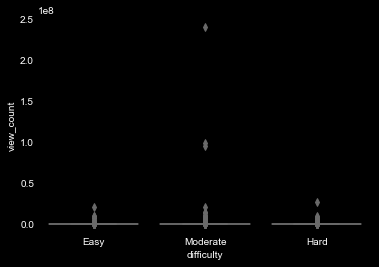

In [20]:
#'''
sns.boxplot(data=df_total, x="difficulty", y="view_count")
#'''

### Upper limit of dataset

There are many outliers in our data. It is important to check out the upper end outliers because they will have a huge impact on our analysis and conclusions.

In [21]:
q_hi = df_total["view_count"].quantile(0.99)

len(df_total[df_total['view_count'] > q_hi])


105

In [22]:
# Max value  
df_total.loc[(df_total['view_count'] > q_hi),'view_count'].max()

240492212

In [23]:
df_total.loc[(df_total['view_count'] > q_hi),'view_count'].min()

2017165

The upper end outliers range from more than 240 million views to  2 million views. These videos will have a huge impact on our analysis later on.

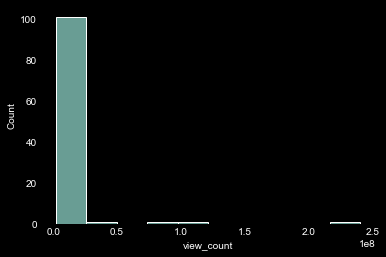

In [24]:
sns.histplot(df_total, x = df_total[df_total['view_count'] > q_hi]['view_count'], bins = 10)

There are just a few videos over 4.000.000 views. Let's check them out:

In [25]:
# Videos with more than 4 million views 
df_new[df_new['view_count']> 4000000]

,video_id,title,description,tags,channel_id,duration,view_count,like_count,topic,subtopic,difficulty,duration_dt,duration_seconds
493,Lxe4FAI-g6s,Como fazer uma MÁQUINA DE CHOQUES caseira para...,CONHEÇA A NOSSA LOJA: https://lojadomanual.com...,"['iberê thenório', 'manual do mundo', 'vídeos'...",UCKHhA5hN2UohhFDfNXB_cvQ,PT11M55S,7236257,246209.0,Cinematica,Movimento e Repouso fisica,Easy,00:11:55,715.0
666,r2ZtYD_hxDw,MOVIMIENTO RECTILÍNEO UNIFORME - Problema 1,#julioprofe (miembro de #EdutubersColombia) ex...,"['fisica', 'julioprofe', 'problemas', 'resuelt...",UCIkCzk3ezlAxX5r2OFlHLaQ,PT5M23S,5453230,84032.0,Cinematica,Movimento Uniforme fisica,Easy,00:05:23,323.0
2065,E43-CfukEgs,Brian Cox visits the world's biggest vacuum | ...,Subscribe and 🔔 to the BBC 👉 https://bit.ly/BB...,"['human universe', 'nasa', 'vacuum', 'space', ...",UCCj956IF62FbT7Gouszaj9w,PT4M42S,21434537,136757.0,Cinematica,Queda livre fisica,Easy,00:04:42,282.0
2404,ekY5VlZ8bqM,Movimento Perpétuo da Água -( Vaso de Boyle ) ...,Perpetual Water Movement - (Boyle's Flask) -- ...,"['Vida em Silício', 'Frasco de Robert Boyle', ...",UCsNLgrmXPqjQmbdPZ4VYgqg,PT4M52S,10142518,137345.0,Cinematica,Queda livre fisica,Easy,00:04:52,292.0
3899,ekY5VlZ8bqM,Movimento Perpétuo da Água -( Vaso de Boyle ) ...,Perpetual Water Movement - (Boyle's Flask) -- ...,"['Vida em Silício', 'Frasco de Robert Boyle', ...",UCsNLgrmXPqjQmbdPZ4VYgqg,PT4M52S,10143976,137359.0,Cinematica,Movimento Circular fisica,Hard,00:04:52,292.0
4448,Lxe4FAI-g6s,Como fazer uma MÁQUINA DE CHOQUES caseira para...,CONHEÇA A NOSSA LOJA: https://lojadomanual.com...,"['iberê thenório', 'manual do mundo', 'vídeos'...",UCKHhA5hN2UohhFDfNXB_cvQ,PT11M55S,7246892,246718.0,Cinematica,Estática de um ponto material fisica,Hard,00:11:55,715.0
4597,kQRHBoq3Xp4,Novo Dia - Ponto de Equilíbrio part. The Congos,"Video-Clipe oficial da música: ""Novo dia"" da B...","['PontodeEquilibrio', 'PontoOficial', 'Reggae'...",UCjisL_wayJkxiVGBC0O3-Sw,PT6M13S,27233112,215523.0,Cinematica,centro de massa e equilíbrio,Hard,00:06:13,373.0
4783,jT7jJbSaWLc,Ponto de Equilíbrio & Alborosie - Dome o Medo,Helio Bentes e Alborosie - Voz / Fitzroy “Dave...,"['PontodeEquilibrio', 'PontoOficial', 'Reggae'...",UCjisL_wayJkxiVGBC0O3-Sw,PT4M9S,4413511,46648.0,Cinematica,centro de massa e equilíbrio,Hard,00:04:09,249.0
4868,3-beqoWSMjA,Cidade Verde Pt. Ponto de Equilibrio e Dada Yu...,Acesse em todas as plataformas:\nhttps://ONErp...,"['cidade verde', 'cidade verde sounds', 'reggi...",UC489v5aAYxCbj_51C-l5CnQ,PT6M22S,4926119,58025.0,Cinematica,centro de massa e equilíbrio,Hard,00:06:22,382.0
6185,7l7imX5pts4,2 MELHORES EXERCÍCIOS DE DESCOMPRESSÃO DA COLU...,2 MELHORES EXERCÍCIOS DE DESCOMPRESSÃO DA COLU...,"['“Fisioprev”', '“fisioterapia”', '“Guilherme ...",UCD9Sbq0xN8eE2xcYhTkyh-g,PT18M26S,4824235,380939.0,Dinamica,Forças de tração normal e peso fisica,Moderate,00:18:26,1106.0


In [26]:
len(df_new[df_new['view_count']> 4000000])

40

Most of these videos are not about physics. The ones that are about physics are not in Portuguese. 

The channels of these videos do not have content that interests us, so instead of dropping the videos, let's drop all the videos from the channels using their channel id.


In [27]:
# Create a dataframe with the high viewed videos
df_total_upper = df_new[df_new['view_count']> 4000000]
#Create an array with the unique values for the channel_id of the high views videos
unique_channel_id = df_total_upper['channel_id'].unique()

In [28]:
len(df_total[df_total['channel_id'].isin(unique_channel_id)])

101

As expected, there are more videos from those channels. Let's drop them all.

In [29]:
df_clean_1 = df_total[~df_total['channel_id'].isin(unique_channel_id)]

## Score 0 videos

In [30]:
# Number of videos with score 0
len(df_clean_1.loc[df_clean_1['score(%)'] == 0])

2730

In [31]:
len(df_clean_1.loc[df_clean_1['score(%)'] == 0])*100/len(df_clean_1)

26.358984261851887

Around 26% of our dataset has score 0. This is a big chunck, however, for our purposes, it is hard to derive solid conclusion from videos with less than 100 views.

In [32]:
# Find videos with score 0 (less than 100 views by definition)
# and get their index
index_score_0 = df_clean_1.loc[df_clean_1['score(%)'] == 0].index
# Drop first outliers 
df_clean_2 = df_clean_1.drop(index_score_0)

In [33]:
 df_clean_2.to_csv('df2.csv')